## Task 1- Linear Regression with Python

### Simple Linear Regression task with two variables 
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

In [39]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn

### Reading the dataset

In [40]:
#reading the dataset

dataset=pd.read_csv("student_scores - student_scores.csv")

In [41]:
dataset.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [42]:
#knowing about dataset
print(dataset.shape)
dataset.describe()

(25, 2)


,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### Visualization of data

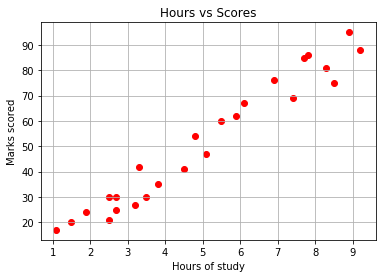

In [43]:
plt.scatter(dataset['Hours'],dataset['Scores'],c='r')
plt.xlabel("Hours of study")
plt.ylabel("Marks scored")
plt.title("Hours vs Scores")
plt.grid()
plt.show()

### Splitting and preparing the dataset 

In [44]:
from sklearn.model_selection import train_test_split
X=dataset["Hours"].values
Y=dataset["Scores"].values

print(X.shape,Y.shape)
#print(X,Y)

X=X.reshape(-1,1)     #converting in 2d array
Y=Y.reshape(-1,1)

#print(X,Y)
print(X.shape,Y.shape)

#convert into train test split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=0)


(25,) (25,)
(25, 1) (25, 1)


In [45]:
#Splitted data 
print("Training Data")
print(X_train.T,X_train.shape)
print(Y_train.T,X_train.shape)

Training Data
[[7.8 6.9 1.1 5.1 7.7 3.3 8.3 9.2 6.1 3.5 2.7 5.5 2.7 8.5 2.5 4.8 8.9 4.5]] (18, 1)
[[86 76 17 47 85 42 81 88 67 30 25 60 30 75 21 54 95 41]] (18, 1)


### Training the model

In [46]:
from sklearn.linear_model import LinearRegression
lr_model=LinearRegression()
lr_model.fit(X_train,Y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Prediction on Test data

In [47]:
pred=lr_model.predict(X_test)
#print(Y_test)
df=pd.DataFrame({'Actual':Y_test[:,0],'predicted':pred[:,0]})
df

,Actual,predicted
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


### Visualization of regression line

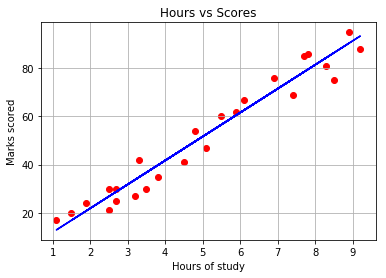

In [48]:
plt.scatter(X,Y,c='r')
plt.plot(X,lr_model.predict(X),c='b')
plt.xlabel("Hours of study")
plt.ylabel("Marks scored")
plt.title("Hours vs Scores")
plt.grid()
plt.show()

In [49]:
#predicting score for 9.25 hrs
sc=lr_model.predict(9.25)
print("Predicted Score, if 9.25 hrs of study = ",sc[0][0])

Predicted Score, if 9.25 hrs of study =  93.89272889341655


### Evaluating the model

In [50]:
from  sklearn import metrics
#MAE
mae=metrics.mean_absolute_error(Y_test,pred)
print("Mean absolute error : ",mae)
#MSE
mse=metrics.mean_squared_error(Y_test,pred)
print("Mean Squared error : ",mse)


Mean absolute error :  4.130879918502486
Mean Squared error :  20.33292367497997
